# Making a Realistic Situation

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def calculate_monthly_payment(loanAmount, interestRate, loanTermYears):
    monthlyInterest = interestRate/12
    numberOfPayments = loanTermYears*12
    return loanAmount*(monthlyInterest*(1+monthlyInterest)**numberOfPayments)/((1+monthlyInterest)**numberOfPayments-1)

def amortization(loanAmount, interestRate, loanTermYears, loanBalance):
    totalMonthlyPayment = calculate_monthly_payment(loanAmount, interestRate, loanTermYears)
    principal = totalMonthlyPayment-(loanBalance*interestRate/12)
    interest = totalMonthlyPayment - principal
    return interest, principal


In [14]:
class Situation:
    def __init__(self, name, budget, price, rate, term):
        self.name = name
        self.budget = budget
        self.price = price
        self.rate = rate
        self.term = term
        
        # calculated externally
        self.mortgagePayment = -1

def setup_situation(situation):
    situation.mortgagePayment = round(calculate_monthly_payment(situation.price,
                                                                situation.rate,
                                                                situation.term),2)

    

In [15]:
def simulate_savings_situation(situation):
    setup_situation(situation)
    price = situation.price
    rate = situation.rate
    term = situation.term
    budget = situation.budget
    principal = 0
    interest = 0
    savings = 0
    pList = []
    iList = []
    sList = []
    tList = []
    # Loop through every month
    for i in range(term*12):
        it, pt = amortization(price, rate, term, price-principal)
        principal = round(principal + pt, 2)
        interest = round(it + interest, 2)
        savings = round(savings + budget - situation.mortgagePayment, 2)
        pList.append(principal)
        iList.append(interest)
        sList.append(savings)
        tList.append(principal+interest)
    return pList, iList, sList, tList

def simulate_payoff_situation(situation):
    setup_situation(situation)
    price = situation.price
    rate = situation.rate
    term = situation.term
    budget = situation.budget
    principal = 0
    interest = 0
    savings = 0
    pList = []
    iList = []
    sList = []
    tList = []
    # Loop through every month
    for i in range(term*12):
        if principal < price:
            extra = budget - situation.mortgagePayment
            it, pt = amortization(price, rate, term, price-principal)
            pt = pt + extra
            savings = 0
        else:
            it = 0
            pt = 0
            savings = round(savings+budget, 2)
        principal = round(principal + pt, 2)
        interest = round(it + interest, 2)
        
        pList.append(principal)
        iList.append(interest)
        sList.append(savings)
        tList.append(principal+interest)          
    return pList, iList, sList, tList    

In [16]:
def plot_situation(situation, simulation):
    principal, interest, savings, total = simulation(situation)
    print(principal[144], interest[144], savings[144], total[144])
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].plot(principal)
    ax[0].plot(interest)
    ax[1].plot(savings)
    ax[1].plot(total)
    for a in ax:
        a.grid()

71582.35 161935.02 201483.3 233517.37


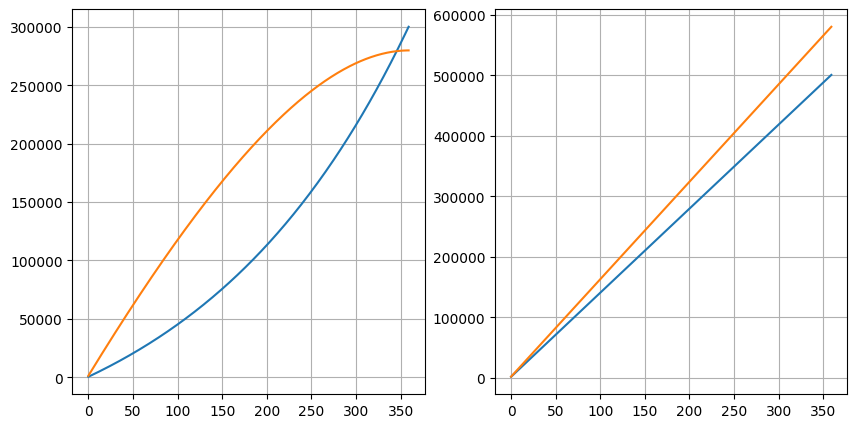

In [17]:
situation = Situation("300k", 3000, 300000, 0.05, 30)
plot_situation(situation, simulate_savings_situation)

301113.89 88886.7 45000 390000.59


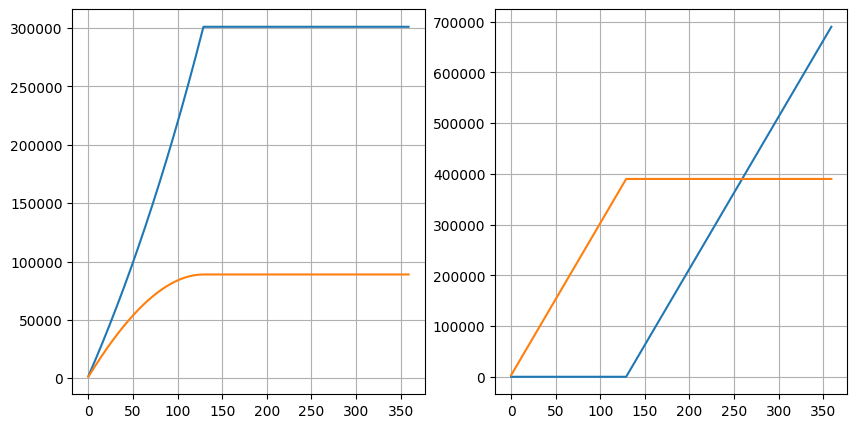

In [18]:
situation = Situation("300k", 3000, 300000, 0.05, 30)
plot_situation(situation, simulate_payoff_situation)